In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\tensorflow-wavelets\\src\\tensorflow_wavelets')

import tensorflow_wavelets.Layers.DWT as DWT
import tensorflow_wavelets.Layers.Activation as Activition
from utils.plot import *

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt




In [13]:
nb_classes = 10
batch_size = 32
epochs = 2

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Remove images to get smaller dataset
# x_train = x_train[:1000, :, :]
# y_train = y_train[:1000]
# x_test = x_test[:500, :, :]
# y_test = y_test[:500]


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)


In [14]:
# load DWT db2 model
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(DWT.DWT(name="db2"))
# model.add(Activition.SureSoftThreshold())
model.add(DWT.IDWT(name="db2"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dwt_1_db2 (DWT)              (None, 30, 30, 1)         0         
_________________________________________________________________
idwt_1_db2 (IDWT)            (None, 28, 28, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=losses.MeanSquaredError(),
              optimizer=optimizer, metrics=["accuracy"])

In [16]:
history = model.fit(x_train, x_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Epoch 1/2
1500/1500 - 9s - loss: 0.0104 - accuracy: 0.8141 - val_loss: 0.0105 - val_accuracy: 0.8149
Epoch 2/2
1500/1500 - 8s - loss: 0.0104 - accuracy: 0.8141 - val_loss: 0.0105 - val_accuracy: 0.8149


<module 'matplotlib.pyplot' from 'C:\\Users\\Olya\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

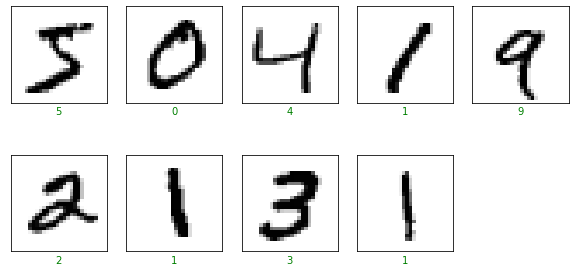

In [20]:
plot_n_examples(x_train, y_train)

<module 'matplotlib.pyplot' from 'C:\\Users\\Olya\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

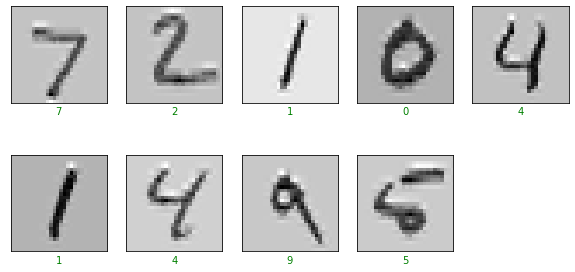

In [21]:
out = model.predict(x_test)
plot_n_examples(out, y_test)


<module 'matplotlib.pyplot' from 'C:\\Users\\Olya\\Anaconda3\\envs\\test\\lib\\site-packages\\matplotlib\\pyplot.py'>

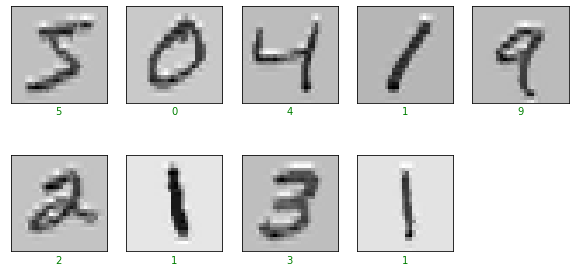

In [22]:
out = model.predict(x_train)
plot_n_examples(out, y_train)